In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("bigdatamart_test.csv")
df.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# EDA for Test Data

In [3]:
df.shape

(5681, 11)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


key observations here

mean and median are almost near in all columns
There is small differnece in 75% and max values. mean few outliers are there

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

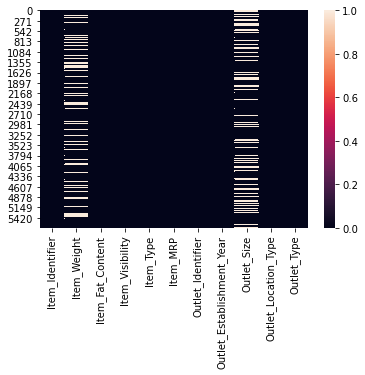

In [8]:
sns.heatmap(df.isnull())

There are null values in column Item_Weight and Outlet_Size

In [9]:
dfcor=df.corr()
dfcor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.019089,0.049809,0.018918
Item_Visibility,-0.019089,1.000000,-0.014013,-0.097040
Item_MRP,0.049809,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.018918,-0.097040,-0.007233,1.000000


<AxesSubplot:>

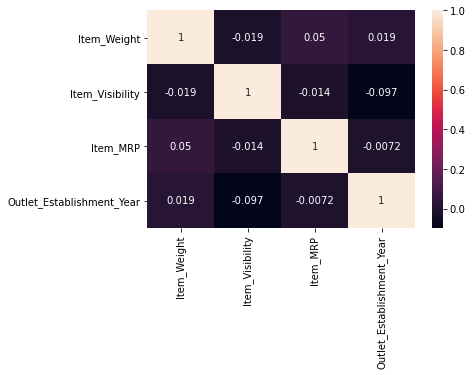

In [10]:
plt.Figure(figsize=(6,4))
sns.heatmap(dfcor,annot=True)

Corr() shows the negitive correlation of all featues with Item_Visibility. we may think to drop it later

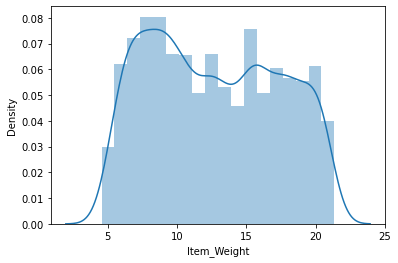

In [11]:
sns.distplot(df["Item_Weight"])
plt.show()

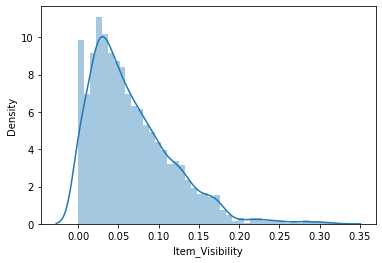

In [12]:
sns.distplot(df["Item_Visibility"])
plt.show()

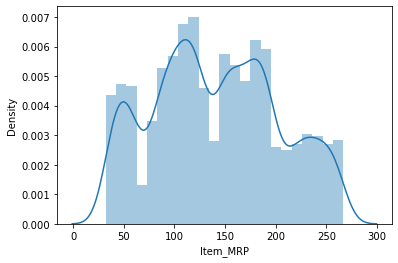

In [13]:
sns.distplot(df["Item_MRP"])
plt.show()

Univariate analysis shows the data is not normalised.

Bivariate analysis not done as this dataset has no target variable

Checking the unique values below variables are having . So as to convert the nominal values to numerical for further data modelling

In [14]:
df.Item_Identifier.unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

In [15]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [16]:
df.Item_Type.unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [17]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

# Data cleaning process

drop column Item_visibility as it has negitive coorelation with all the features

Outlet_Size variable can also be dropped as it has no relation with sales

change nominal values to numerical values

filliing the null values in Item_Weight and Outlet_Size with mean()

After that, Removing of outliers if reqd.

In [18]:
df.drop(["Item_Visibility","Outlet_Size"],axis=1,inplace=True)

df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,Snack Foods,107.8622,OUT049,1999,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,Dairy,87.3198,OUT017,2007,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,Others,241.7538,OUT010,1998,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,Snack Foods,155.0340,OUT017,2007,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,Dairy,234.2300,OUT027,1985,Tier 3,Supermarket Type3


In [19]:
df['Item_Weight'] = df['Item_Weight'].fillna((df['Item_Weight'].mean()))

In [20]:
# changing the nominal value to integer for training model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [21]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,13,107.8622,9,1999,0,1
1,1067,8.300000,4,4,87.3198,2,2007,1,1
2,1406,14.600000,1,11,241.7538,0,1998,2,0
3,809,7.315000,1,13,155.0340,2,2007,1,1
4,1184,12.695633,2,4,234.2300,5,1985,2,3


# Handling the outliers

All columns are categorical other than below 2 features. so checking the possibility in these two

<AxesSubplot:>

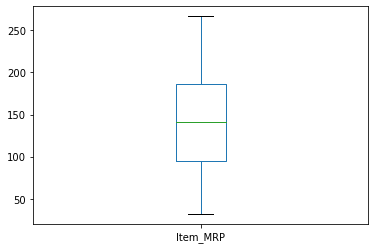

In [22]:
df["Item_MRP"].plot.box()

<AxesSubplot:>

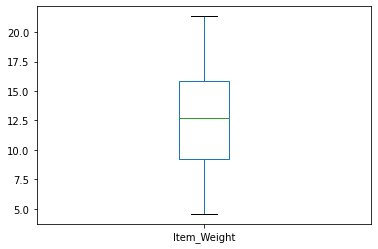

In [23]:
df["Item_Weight"].plot.box()

In [24]:
from scipy.stats import zscore


In [25]:
z=np.abs(zscore(df))
z

array([[0.73989552, 1.89745979, 0.57528374, ..., 0.13989058, 1.369215  ,
        0.25276858],
       [0.65908503, 1.03552991, 4.10469757, ..., 1.09551169, 0.1388274 ,
        0.25276858],
       [1.42005049, 0.44863355, 0.57528374, ..., 0.02043794, 1.0915602 ,
        1.50799439],
       ...,
       [1.43351891, 0.63504136, 0.57528374, ..., 0.4982485 , 0.1388274 ,
        0.25276858],
       [0.57551969, 0.6135406 , 0.98471003, ..., 1.09551169, 0.1388274 ,
        0.25276858],
       [0.47950616, 0.75283211, 0.98471003, ..., 0.4982485 , 0.1388274 ,
        0.25276858]])

In [26]:
threshold=3
print(np.where(z>3))

(array([   1,  103,  242,  369,  499,  595,  739,  783,  797,  815,  985,
        996, 1025, 1037, 1105, 1143, 1256, 1284, 1314, 1321, 1422, 1437,
       1539, 1757, 1780, 1853, 1927, 2070, 2167, 2271, 2275, 2365, 2595,
       2798, 2866, 2915, 2926, 3039, 3077, 3097, 3357, 3362, 3461, 3565,
       3622, 3744, 3778, 3783, 3950, 4021, 4133, 4146, 4148, 4232, 4330,
       4334, 4340, 4352, 4478, 4542, 4616, 4692, 4726, 4845, 4870, 4921,
       4941, 4965, 4970, 5132, 5154, 5168, 5323, 5328, 5429, 5447, 5542,
       5671]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))


In [27]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,13,107.8622,9,1999,0,1
2,1406,14.600000,1,11,241.7538,0,1998,2,0
3,809,7.315000,1,13,155.0340,2,2007,1,1
4,1184,12.695633,2,4,234.2300,5,1985,2,3
5,461,9.800000,2,6,117.1492,8,1997,0,1
...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,13,141.3154,8,1997,0,1
5677,306,7.600000,2,15,169.1448,3,2009,2,2
5678,1412,10.000000,1,8,118.7440,7,2002,1,1
5679,517,15.300000,2,3,214.6218,2,2007,1,1


In [28]:
df_new.shape

(5603, 9)

In [29]:
df_new.skew()

Item_Identifier             -0.002211
Item_Weight                  0.140944
Item_Fat_Content             0.268820
Item_Type                    0.092718
Item_MRP                     0.134484
Outlet_Identifier           -0.060267
Outlet_Establishment_Year   -0.398625
Outlet_Location_Type        -0.210245
Outlet_Type                  0.924907
dtype: float64

In [30]:
from sklearn.preprocessing import power_transform

In [31]:
df_new=power_transform(df_new,method='yeo-johnson')

In [32]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df=sc.fit_transform(df_new)
scaled_df.shape

(5603, 9)

# All EDA and preprocessing has been done on test dataset. After data modelling done on Train dataset we will use this test dataset for prediction in the end at the time of conclusion

# EDA for train dataset

In [34]:
ds=pd.read_csv("bigdatamart_train.csv")
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:
ds.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [36]:
ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [37]:
ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [38]:
ds.shape

(8523, 12)

In [39]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

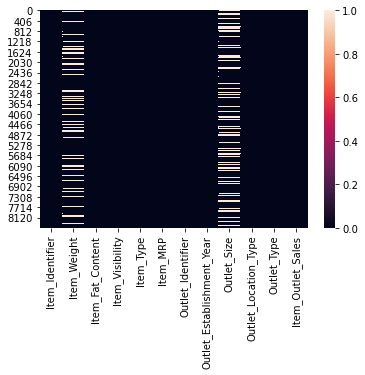

In [40]:
sns.heatmap(ds.isnull())

In [41]:
dscor=ds.corr()
dscor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

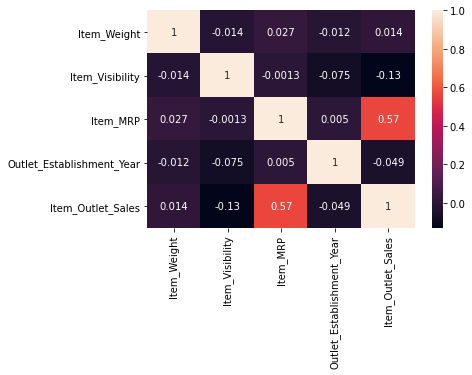

In [42]:
plt.Figure(figsize=(6,4))
sns.heatmap(dscor,annot=True)

#corr() shows Item_Visibility and Outlet_Establishment_Year  is negatively correlated with the target variable Item_Outlet_sales. we may think to dropthem later 

In [43]:
#univariate analysis

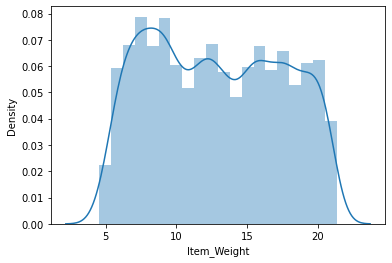

In [44]:
sns.distplot(ds["Item_Weight"])
plt.show()

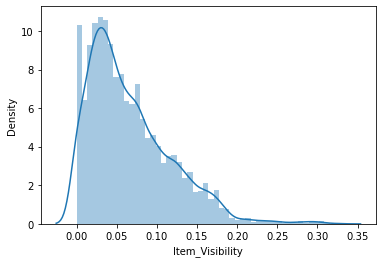

In [45]:
sns.distplot(ds["Item_Visibility"])
plt.show()

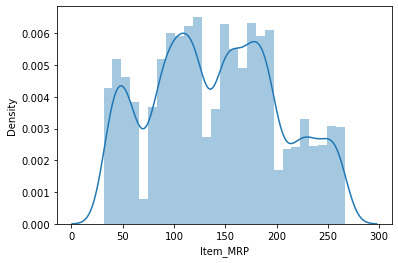

In [46]:
sns.distplot(ds["Item_MRP"])
plt.show()

In [47]:
#bivariate analysis

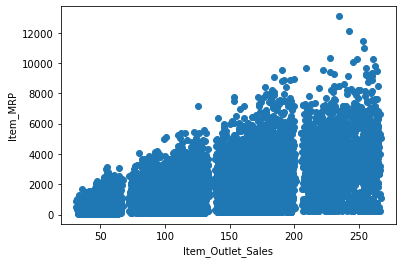

In [48]:
plt.scatter(ds["Item_MRP"],ds["Item_Outlet_Sales"])
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Item_MRP")
plt.show()

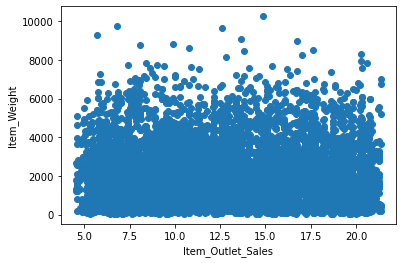

In [49]:
plt.scatter(ds["Item_Weight"],ds["Item_Outlet_Sales"])
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Item_Weight")
plt.show()

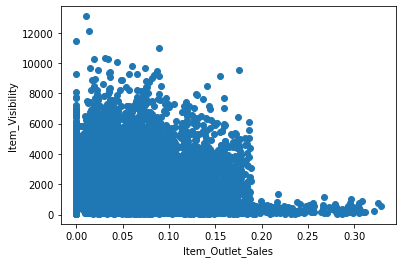

In [50]:
plt.scatter(ds["Item_Visibility"],ds["Item_Outlet_Sales"])
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Item_Visibility")
plt.show()

# Data cleaning process
drop column Item_visibility as it has negitive coorelation with all the features

Outlet_Size variable can also be dropped as it has no relation with sales

change nominal values to numerical values

filliing the null values in Item_Weight and Outlet_Size with mean()

After that, Removing of outliers if reqd.

In [51]:
ds.drop(["Item_Visibility","Outlet_Size"],axis=1,inplace=True)

ds.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [52]:
ds['Item_Weight'] = ds['Item_Weight'].fillna((ds['Item_Weight'].mean()))

In [53]:
# changing the nominal value to integer for training model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))

# Handling the outliers¶

<AxesSubplot:>

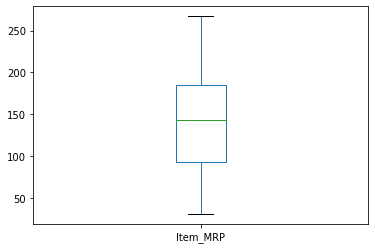

In [54]:
ds["Item_MRP"].plot.box()

<AxesSubplot:>

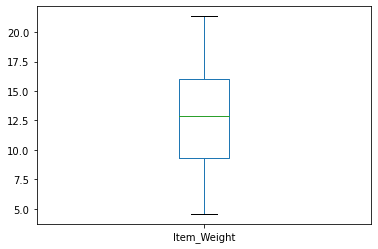

In [55]:
ds["Item_Weight"].plot.box()

In [56]:
collist=ds.columns.values
ncol=12
nrows=10

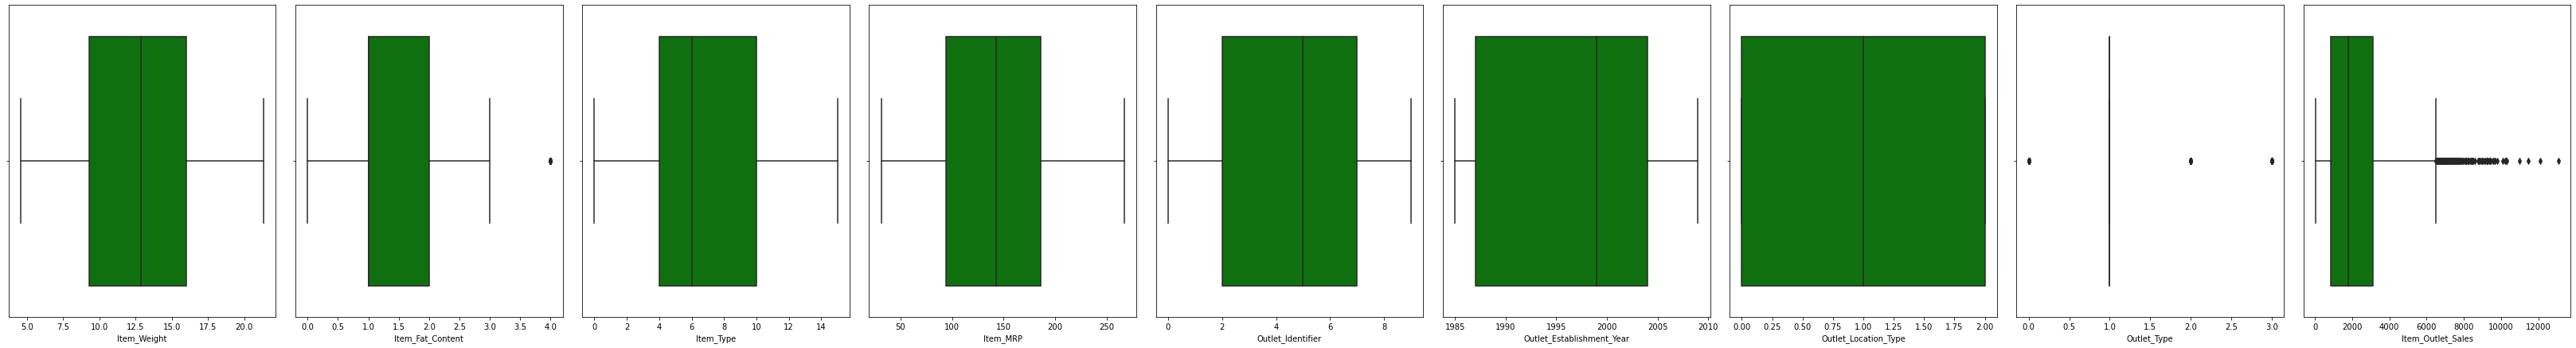

In [57]:
plt.figure(figsize=(5*ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ds[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [58]:
from scipy.stats import zscore

In [59]:
z=np.abs(zscore(ds))
z

array([[1.38851383, 0.84187169, 0.57284357, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.64170589, 0.97809218, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.09855449, 0.57284357, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.53424315, 0.57284357, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.33644372, 0.97809218, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.45963367, 0.57284357, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [60]:
threshold=3
print(np.where(z>3))

(array([  81,  130,  145,  151,  199,  276,  304,  333,  339,  373,  396,
        456,  472,  489,  615,  661,  694,  727,  753,  753,  809,  838,
        891,  935,  991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138,
       1183, 1209, 1254, 1372, 1433, 1450, 1506, 1512, 1542, 1549, 1576,
       1615, 1617, 1684, 1723, 1753, 1769, 1859, 1998, 2062, 2109, 2111,
       2143, 2168, 2173, 2216, 2223, 2238, 2293, 2331, 2438, 2516, 2535,
       2552, 2569, 2660, 2678, 2776, 2905, 2971, 2973, 3011, 3083, 3087,
       3098, 3154, 3225, 3234, 3241, 3242, 3243, 3286, 3335, 3367, 3407,
       3480, 3491, 3509, 3545, 3582, 3602, 3667, 3709, 3720, 3757, 4019,
       4083, 4163, 4245, 4289, 4290, 4346, 4349, 4393, 4415, 4463, 4676,
       4680, 4681, 4772, 4865, 4888, 4961, 4991, 5047, 5054, 5065, 5133,
       5146, 5177, 5185, 5202, 5223, 5315, 5401, 5417, 5467, 5500, 5539,
       5550, 5577, 5611, 5619, 5633, 5752, 5784, 5799, 5812, 5977, 6000,
       6132, 6134, 6176, 6268, 6334, 6344, 6357, 6

In [61]:
ds_new=ds[(z<3).all(axis=1)]
ds_new.shape,ds.shape

((8317, 10), (8523, 10))

In [62]:
ds_new.skew()

Item_Identifier             -0.012257
Item_Weight                  0.088509
Item_Fat_Content             0.283015
Item_Type                    0.095381
Item_MRP                     0.137207
Outlet_Identifier           -0.059837
Outlet_Establishment_Year   -0.407954
Outlet_Location_Type        -0.198586
Outlet_Type                  0.936402
Item_Outlet_Sales            0.884446
dtype: float64

little skewness is there so we will remove it

In [63]:
ds_x=ds_new.drop(columns=['Item_Outlet_Sales'])
y_t=pd.DataFrame(ds_new['Item_Outlet_Sales'])
print(ds_x.shape, y_t.shape)

(8317, 9) (8317, 1)


In [64]:
from sklearn.preprocessing import power_transform

In [65]:
ds_x=power_transform(ds_x,method='yeo-johnson')

In [66]:
#y=ds_new.iloc[:,-1]
#y.shape

#scaling the dataset

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(ds_x)
scaledX.shape

(8317, 9)

In [69]:
# finding the best random state

In [79]:
# importing our model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [81]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y_t,test_size=.22,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    predlr=mod.predict(x_test)
    tempaccu=r2_score(y_test,predlr)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 54.641543112060795 Random state 133


In [82]:
#using the best random state

In [83]:
x_train,x_test,y_train,y_test=train_test_split(scaledX,y_t,test_size=.22,random_state=133)

In [84]:
x_train.shape

(6487, 9)

In [85]:
x_test.shape

(1830, 9)

In [86]:
y_train.shape

(6487, 1)

In [87]:
y_test.shape

(1830, 1)

# Finding the best model

Linear Regression

In [88]:
#using algorithms in for loops
model=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
    print(m , "\nAccuracy Score of " ,r2score*100, "Cross Val Score", {cvscore*100})
    print("**********************************************************************\n")

LinearRegression() 
Accuracy Score of  54.641543112060795 Cross Val Score {50.274240802335314}
**********************************************************************

RandomForestRegressor() 
Accuracy Score of  57.21418416539357 Cross Val Score {50.274240802335314}
**********************************************************************

KNeighborsRegressor() 
Accuracy Score of  53.684223020201706 Cross Val Score {50.274240802335314}
**********************************************************************

GradientBoostingRegressor() 
Accuracy Score of  62.155659692507584 Cross Val Score {50.274240802335314}
**********************************************************************



In [89]:
# GradientBoostingRegressor is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [90]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [91]:
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 15, 'random_state': 1}

In [92]:
# using GradientBoostingRegressor with best parameters
gbr=GradientBoostingRegressor(learning_rate= 0.1,max_depth= 4,n_estimators= 15, random_state=1)
gbr.fit(x_train,y_train)
print(" Score is ",gbr.score(x_train,y_train))
predgb=gbr.predict(x_test)
print("r2 score " , r2_score(y_test,predgb))
print("**********************************************************************\n")

 Score is  0.5631543064827835
r2 score  0.5872764274609625
**********************************************************************



# Conclusion

GradientBoostingRegressor() is best performing model with r2score 62% and cross validation score with minimum distance of 57

# Saving the model- Serialization

In [93]:
# saving the prediction model

import pickle
filename="Bigmartdata.pkl"
pickle.dump(gbr,open(filename,'wb'))

In [94]:
# load the model
fitted_model=pickle.load(open("Bigmartdata.pkl",'rb'))

In [95]:
fitted_model

GradientBoostingRegressor(max_depth=4, n_estimators=15, random_state=1)

In [96]:
# predictions over test data (bigdatamart_test.csv)
predictions=fitted_model.predict(scaled_df)

In [97]:
predictions

array([1767.10287561,  886.41959701, 2462.38099012, ..., 1897.5685798 ,
       3288.48427549, 1518.16663491])